In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Train_set = pd.read_csv('Training.csv')

In [ ]:
Train_set.shape

(4920, 133)

In [ ]:
Train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
Train_set.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection


#Mapping


In [ ]:
dict_Diseases = {'Fungal infection':0, 'Allergy':1, 'GERD':2, 'Chronic cholestasis':3,
       'Drug Reaction':4, 'Peptic ulcer diseae':5, 'AIDS':6, 'Diabetes ':7,
       'Gastroenteritis':8, 'Bronchial Asthma':9, 'Hypertension ':10, 'Migraine':11,
       'Cervical spondylosis':12, 'Paralysis (brain hemorrhage)':13, 'Jaundice':14,
       'Malaria':15, 'Chicken pox':16, 'Dengue':17, 'Typhoid':18, 'hepatitis A':19,
       'Hepatitis B':20, 'Hepatitis C':21, 'Hepatitis D':22, 'Hepatitis E':23,
       'Alcoholic hepatitis':24, 'Tuberculosis':25, 'Common Cold':26, 'Pneumonia':27,
       'Dimorphic hemmorhoids(piles)':28, 'Heart attack':29, 'Varicose veins':30,
       'Hypothyroidism':31, 'Hyperthyroidism':32, 'Hypoglycemia':33,
       'Osteoarthristis':34, 'Arthritis':35,
       '(vertigo) Paroymsal  Positional Vertigo':36, 'Acne':37,
       'Urinary tract infection':38, 'Psoriasis':39, 'Impetigo':40}

In [ ]:
list_Diseases = Train_set['prognosis'].unique()

In [ ]:
#Let's map Train_set['prognosis'] to dict_Diseases

Train_set['prognosis'] = Train_set['prognosis'].map(dict_Diseases)

In [ ]:
Train_set.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Features(X) and Label(Y)

In [ ]:
#Let's assign Prognosis to Y(label)

Y = Train_set['prognosis']


In [ ]:
#Let's assign the columns other than prognosis to Features

Features = Train_set.drop(['prognosis'],axis=1)


In [ ]:
Features.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Train_Test_Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Let's assign that PCA_Norm_Features to X so that we could use this X to train our model
X=Features
#X = Norm_Features

In [ ]:
#To measure the training accuracy and test accuracy while training the model, we split the given Train_set
no_diseases = 41
targets = Y
one_hot = np.eye(41)[targets]

X_train , X_test , y_train , y_test = train_test_split( X , one_hot , test_size=0.33, random_state = 6)
x_train , x_test , Y_train , Y_test = train_test_split( X , Y , test_size=0.33, random_state = 6)

#Logistic Regression

In [ ]:
#import Logistic regression 

from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()

In [ ]:
# fit the model
LRmodel.fit(x_train, Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(LRmodel.score(x_test,Y_test))

1.0


In [ ]:
lr_tr_acc=LRmodel.score(x_train,Y_train)
lr_te_acc=LRmodel.score(x_test,Y_test)
print("Training acc: ",lr_tr_acc)
print("Testing acc: ",lr_te_acc)

Training acc:  1.0
Testing acc:  1.0


#SVM

In [ ]:
#import SVC

from sklearn.svm import SVC

SVM = SVC()

In [ ]:
# fit the model
SVM = SVM.fit(x_train , Y_train)


In [ ]:
print(SVM.score(x_test,Y_test))

1.0


In [ ]:
svm_tr_acc=SVM.score(x_train,Y_train)
svm_te_acc=SVM.score(x_test,Y_test)
print("Training acc: ",svm_tr_acc)
print("Testing acc: ",svm_te_acc)

Training acc:  1.0
Testing acc:  1.0


#Keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
# Neural network
model = Sequential()
model.add(Dense(50, input_dim= 132, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(41, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
52/52 [==============================] - 13s 2ms/step - loss: 3.6337 - accuracy: 0.0988
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 2.9374 - accuracy: 0.3770
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 1.5629 - accuracy: 0.7427
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.9514
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 1.0000
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 1.0000
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 10/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 11

In [ ]:
_, nn_tr_acc = model.evaluate(X_train, y_train, verbose=0)
_, nn_te_acc = model.evaluate(X_test, y_test, verbose=0)
print("Training acc: ",nn_tr_acc)
print("Testing acc: ",nn_te_acc)

Training acc:  1.0
Testing acc:  1.0


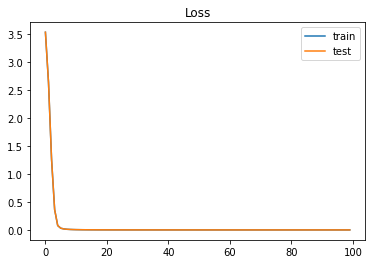

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['loss'], label='test')
plt.legend()

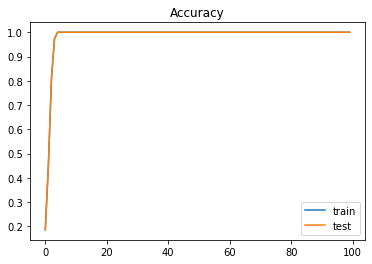

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['accuracy'], label='test')
plt.legend()
#plt.show()

#Comparison of algorithms

In [ ]:
#For comparision of algorithms, let's plot a bar chart

#Storing the names of the algorithms
Models = ['LR' , 'SVM' , 'NN']

#Storing Training Accuracies
Final_Tr_Acc = [lr_tr_acc , svm_tr_acc , nn_tr_acc]

#Storing Test Accuracies
Final_Te_Acc = [lr_te_acc , svm_te_acc , nn_te_acc]

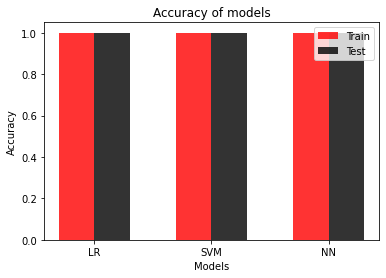

In [ ]:
n = 3
type1 = (lr_tr_acc , svm_tr_acc , nn_tr_acc)
type2 = (lr_te_acc , svm_te_acc , nn_te_acc)


fig, ax = plt.subplots()
index = np.arange(n)
type1=np.array(Final_Tr_Acc)
type2=np.array(Final_Te_Acc)
bar_width = 0.30
opacity = 0.8

rects1 = plt.bar(index, type1, bar_width, alpha=opacity, align='edge',color='red', label='Train')

rects2 = plt.bar(index + bar_width , type2, bar_width, alpha=opacity , align='edge',color='black', label='Test')

plt.xlabel('Models')
plt.ylabel('Accuracy') 
plt.title('Accuracy of models')
plt.xticks(index + bar_width, ('LR', 'SVM', 'NN'))
plt.legend()


#Sample

In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
count = 0
for t in range(len(test)):
  if test[t] == pred[t]:
    count += 1

In [ ]:
#sample

user_input=[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
p=model.predict(user_input)
print(p)
print(type(p),"type(p)")
print(type(p[0][2]),"p[0][2]")
index = np.argmax(p)
print(index)
print(list_Diseases[index])

[[6.60418742e-09 1.46168744e-10 2.25949908e-08 6.69555334e-07
  4.41094999e-05 2.92404718e-03 6.53963411e-07 1.18957999e-09
  9.61580396e-01 7.70974730e-05 1.98296213e-10 4.08458291e-03
  3.84760654e-07 1.79828901e-04 9.60430538e-04 1.20641853e-04
  1.80670770e-03 3.91270618e-07 1.46074069e-03 1.96648818e-02
  8.16794909e-07 3.04906433e-09 7.67483471e-07 1.28096849e-06
  8.23844108e-04 1.06178493e-06 9.90418584e-07 1.79038437e-10
  5.69069847e-10 5.13683517e-06 5.21036918e-06 2.88318982e-03
  6.56225302e-06 2.97817052e-04 2.82257982e-03 1.15876726e-04
  1.05085135e-07 1.20911733e-04 7.59604427e-06 6.00595513e-07
  6.76809435e-08]]
<class 'numpy.ndarray'> type(p)
<class 'numpy.float32'> p[0][2]
8
Gastroenteritis


#Tflite

In [ ]:
from tensorflow import lite  


In [ ]:
# Convert Keras model to TF Lite format.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_float_model = converter.convert()

# Show model size in KBs.
float_model_size = len(tflite_float_model) / 1024
print('Float model size = %dKBs.' % float_model_size)

INFO:tensorflow:Assets written to: /tmp/tmpugl4njv4/assets
Float model size = 39KBs.


In [ ]:
# Re-convert the model to TF Lite using quantization.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Show model size in KBs.
quantized_model_size = len(tflite_quantized_model) / 1024
print('Quantized model size = %dKBs,' % quantized_model_size)
print('which is about %d%% of the float model size.'\
      % (quantized_model_size * 100 / float_model_size))

INFO:tensorflow:Assets written to: /tmp/tmppmgbd0x0/assets


INFO:tensorflow:Assets written to: /tmp/tmppmgbd0x0/assets


Quantized model size = 16KBs,
which is about 41% of the float model size.


In [ ]:
# Save the quantized model to file to the Downloads directory
f = open('MPtflite.tflite', "wb")
f.write(tflite_quantized_model)
f.close()

# Download the digit classification model
from google.colab import files
files.download('MPtflite.tflite')

print('`MPtflite.tflite` has been downloaded')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

`MPtflite.tflite` has been downloaded
